In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HMEQ.csv", engine='python')
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [3]:
df['JOB'].fillna('Other', inplace=True)
df.fillna(df.mean(), inplace=True)

In [4]:
df_dummy = pd.get_dummies(df)
df_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808717,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [5]:
df_y = df_dummy['BAD']
df_x = df_dummy.drop('BAD', axis=1, inplace=False)

In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size =0.3, random_state=1234)
print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (2623, 18)
train data Y size :  (2623,)
test data X size :  (1125, 18)
test data Y size :  (1125, 18)


In [7]:
# 평가저장

In [8]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting', 'NeuralNet']

train_accuracy = []
test_accuracy = []

model_f1_score = []
model_auc = []


In [9]:
# 의사결정나무


In [10]:
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)
dt_model.fit(df_train_x, df_train_y)
train_accuracy.append(dt_model.score(df_train_x,df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))
y_pred = dt_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)



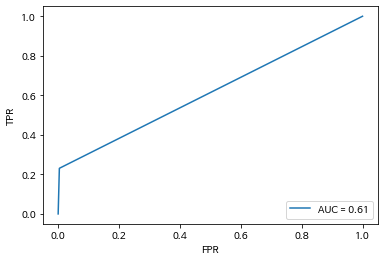

In [11]:
plt.plot(fpr, tpr, label="AUC = %.2f"%(roc_auc))
plt.legend(loc='lower right')
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [12]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [13]:
# 랜덤포레스트

In [14]:
rf_model = RandomForestClassifier(max_depth=4, min_samples_leaf=20, n_estimators=100, random_state=1234)
rf_model.fit(df_train_x, df_train_y)
train_accuracy.append(rf_model.score(df_train_x,df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))
y_pred = rf_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)



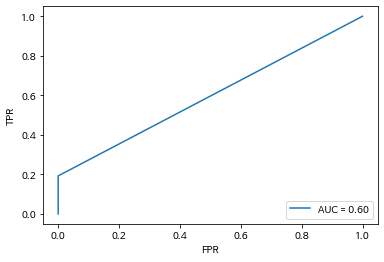

In [15]:
plt.plot(fpr, tpr, label="AUC = %.2f"%(roc_auc))
plt.legend(loc='lower right')
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [16]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [17]:
# 그래디언트부스팅

In [18]:
gb_model = GradientBoostingClassifier(max_depth=4, min_samples_leaf=10,n_estimators=100, learning_rate=0.1, random_state=1234)
gb_model.fit(df_train_x, df_train_y)
train_accuracy.append(gb_model.score(df_train_x,df_train_y))
test_accuracy.append(gb_model.score(df_test_x, df_test_y))
y_pred = gb_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)



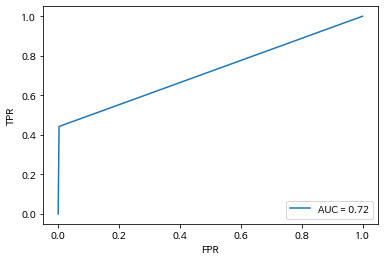

In [19]:
plt.plot(fpr, tpr, label="AUC = %.2f"%(roc_auc))
plt.legend(loc='lower right')
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [20]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [21]:
# 설명변수 scaling

In [22]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns =v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [23]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size =0.3, random_state=1234)
print("train data X size : ", df_scaled_train_x.shape)
print("test data X size : " ,df_scaled_test_x.shape)



train data X size :  (2623, 18)
test data X size :  (1125, 18)


In [24]:
# 인공신경망

In [25]:
nn_model = MLPClassifier(hidden_layer_sizes=(80,80), activation='relu', solver='adam',random_state=1234)
nn_model.fit(df_scaled_train_x, df_train_y)
train_accuracy.append(nn_model.score(df_scaled_train_x,df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x, df_test_y))
y_pred = nn_model.predict(df_scaled_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)



/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


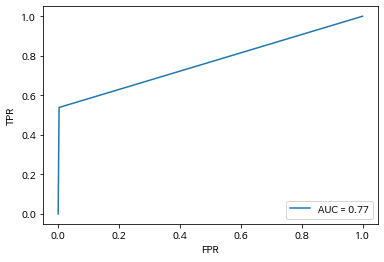

In [26]:
plt.plot(fpr, tpr, label="AUC = %.2f"%(roc_auc))
plt.legend(loc='lower right')
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [27]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [28]:
df_eval = pd.DataFrame(index=model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval["F1score"] = model_f1_score
df_eval["Auc"] = model_auc
df_eval.round(3)


,TrainAccuracy,TestAccuracy,F1score,Auc
DecisionTree,0.930,0.925,0.364,0.613
RandomForest,0.927,0.925,0.323,0.596
GradientBoosting,0.977,0.946,0.601,0.720
NeuralNet,1.000,0.955,0.687,0.768


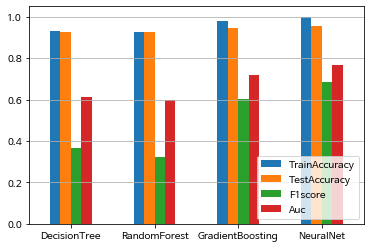

In [29]:
df_eval.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.grid(axis='y')